In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost

In [2]:
pwd

'C:\\Users\\Lenovo\\my_project'

In [3]:
df = pd.read_csv('indian_liver_patient.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.rename(columns={"Albumin_and_Globulin_Ratio": "A-G Ratio", "Dataset": "Diseased"}, inplace= True)

In [6]:
df


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A-G Ratio,Diseased
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [7]:
df.drop_duplicates(keep='first',inplace= True) 
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A-G Ratio,Diseased
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,570.0,44.849123,16.242182,4.0,33.0,45.00,58.00,90.0
Total_Bilirubin,570.0,3.321754,6.267941,0.4,0.8,1.00,2.60,75.0
Direct_Bilirubin,570.0,1.497544,2.833231,0.1,0.2,0.30,1.30,19.7
Alkaline_Phosphotase,570.0,291.750877,245.291859,63.0,176.0,208.00,298.00,2110.0
Alamine_Aminotransferase,570.0,79.728070,181.471697,10.0,23.0,35.00,60.00,2000.0
Aspartate_Aminotransferase,570.0,109.380702,290.880671,10.0,25.0,41.00,86.75,4929.0
Total_Protiens,570.0,6.496316,1.088300,2.7,5.8,6.60,7.20,9.6
Albumin,570.0,3.148947,0.796813,0.9,2.6,3.10,3.80,5.5
A-G Ratio,566.0,0.948004,0.319635,0.3,0.7,0.95,1.10,2.8
Diseased,570.0,1.287719,0.453097,1.0,1.0,1.00,2.00,2.0


In [9]:
df['A-G Ratio'].fillna(df['A-G Ratio'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   A-G Ratio                   570 non-null    float64
 10  Diseased                    570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\3601228559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A-G Ratio'].fillna(df['A-G Ratio'].mean(), inplace=True)


In [10]:
df['Gender'].value_counts()

Gender
Male      430
Female    140
Name: count, dtype: int64

In [11]:
df2=pd.get_dummies(df['Gender'])
df2.head()

,Female,Male
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True


In [12]:
df=pd.concat([df,df2], axis=1)

In [13]:
df=df.drop(['Gender','Female'], axis=1)


In [14]:
df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A-G Ratio,Diseased,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,False
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,True
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,True
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,True
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,True
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,True
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,True
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,True
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,True


In [15]:
#Encoding  successful where 1 denotes male, 0 denotes females
df['Male'].value_counts()

Male
True     430
False    140
Name: count, dtype: int64

In [16]:
df['Diseased'].value_counts()

Diseased
1    406
2    164
Name: count, dtype: int64

In [17]:
df['Diseased'] = df['Diseased'].apply(lambda x: 0 if x == 2 else x)

In [18]:
df['Diseased'].value_counts()

Diseased
1    406
0    164
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\2277781991.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[col],bins=50,hist=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16904\2277781991.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df[col],bins=50,hist=True)
C:\Users\L

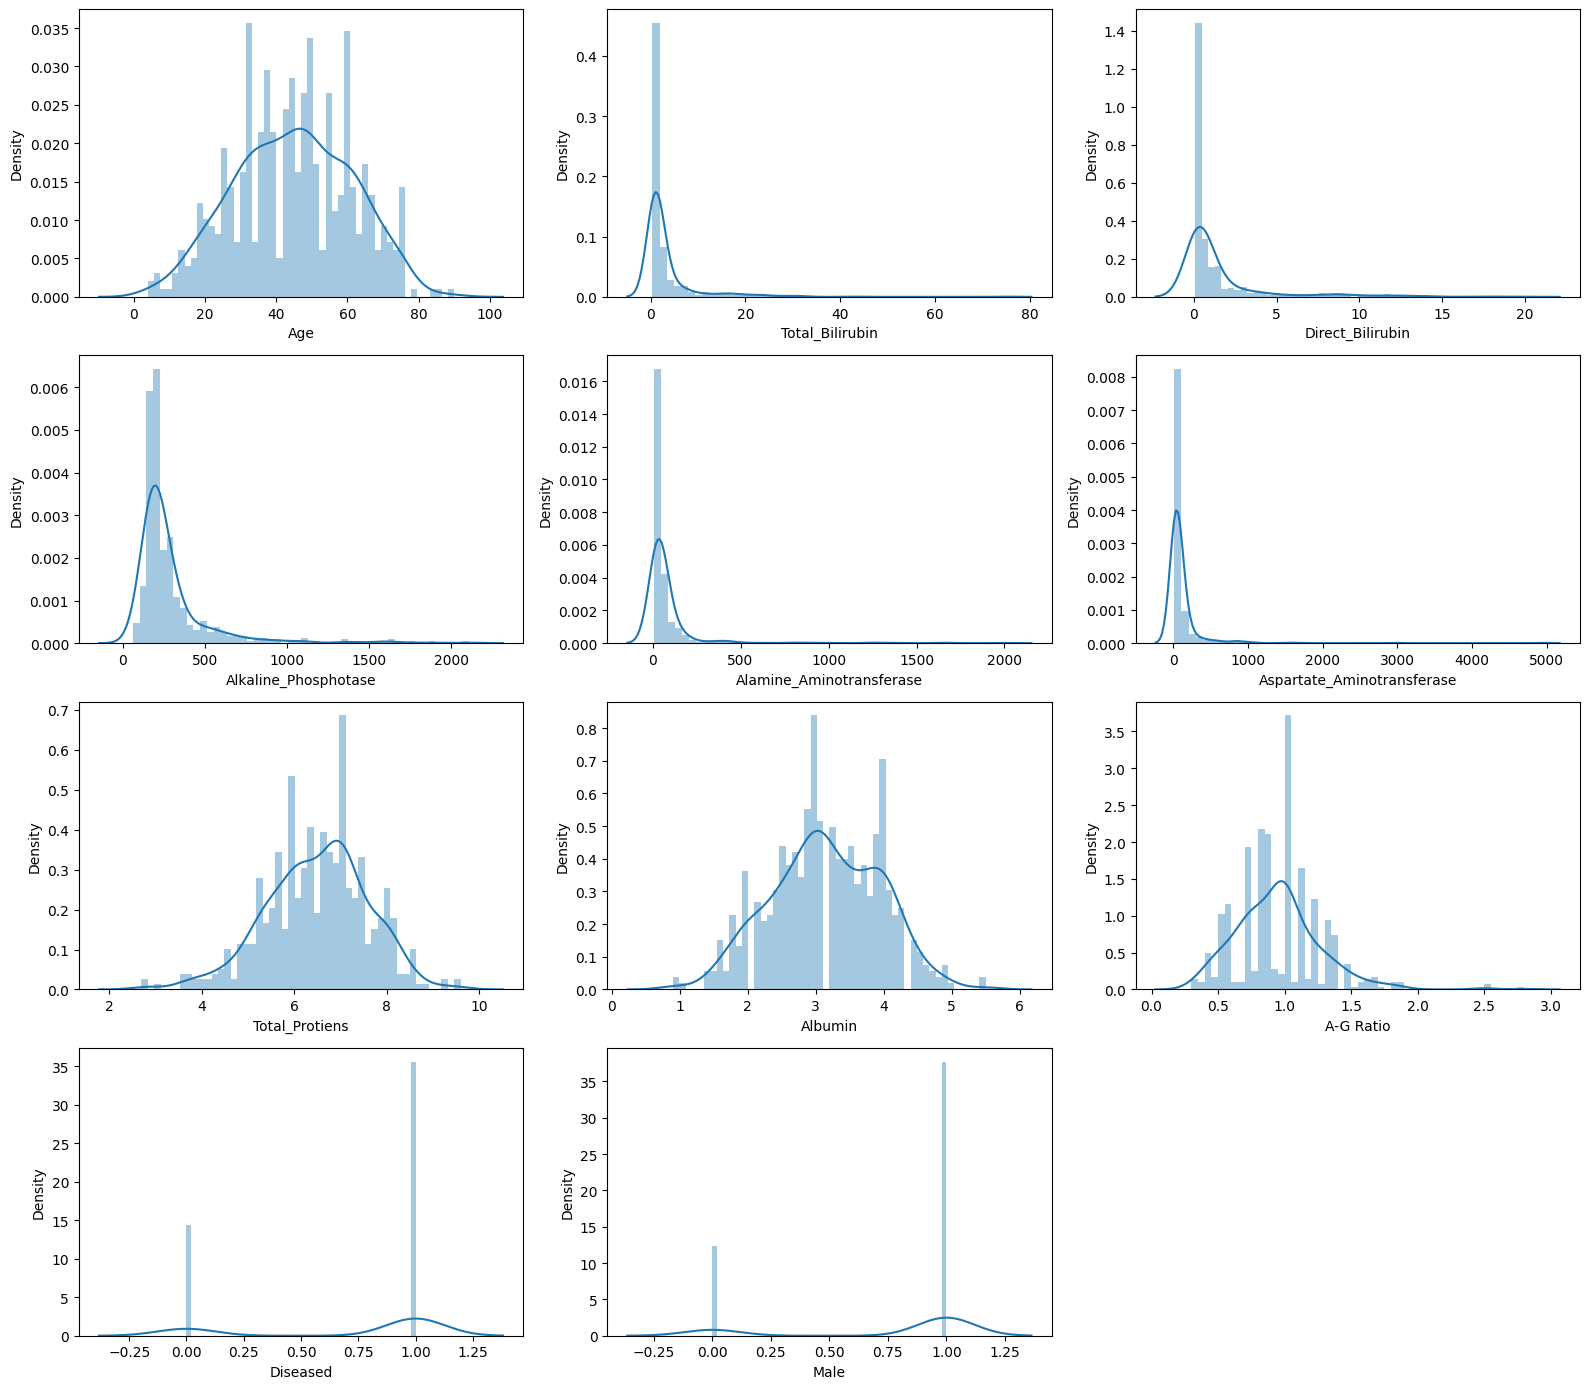

In [19]:
plt.figure(figsize=(16,14))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.distplot(a=df[col],bins=50,hist=True)
    plt.tight_layout()

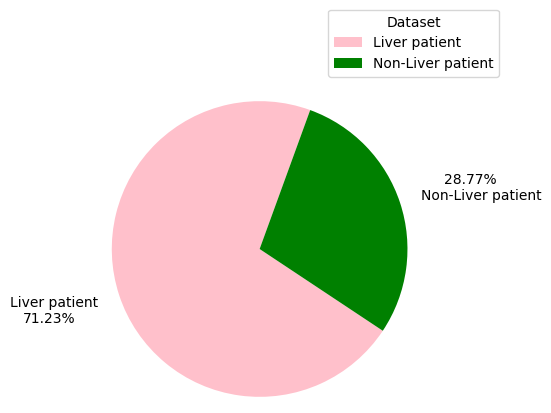

In [20]:
fig = plt.figure(figsize=(5,4))
plt.pie(df['Diseased'].value_counts(),labels=['Liver patient','Non-Liver patient'],radius=1.2,
colors = ['pink','green'],autopct='%1.2f%%',pctdistance=1.5 ,labeldistance=1.15,startangle =70)

plt.legend(title = 'Dataset',loc='upper right', bbox_to_anchor=(1.3,1.3))
plt.show()

<Axes: >

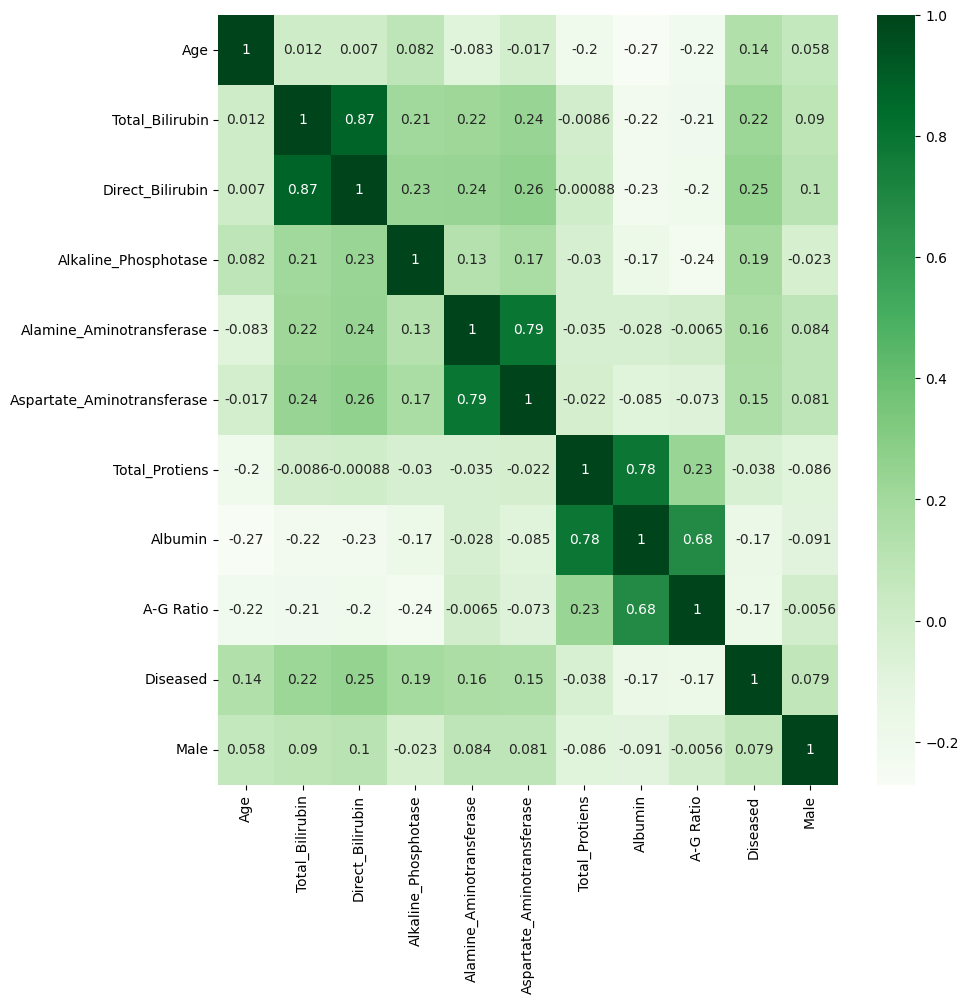

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap ='Greens')  

#Assuming threshold limit of 0.75, we infer that multicollinearity exists between following

# Total_Bilirubin - Direct_Bilirubin
# Alamine_Aminotransferase - Aspartate_Aminotransferase
# Total_Protiens - Albumin

In [22]:
df.drop('Total_Bilirubin', axis=1, inplace= True)
df.drop('Alamine_Aminotransferase', axis=1, inplace= True)
df.drop('Total_Protiens', axis=1, inplace= True)

<Axes: >

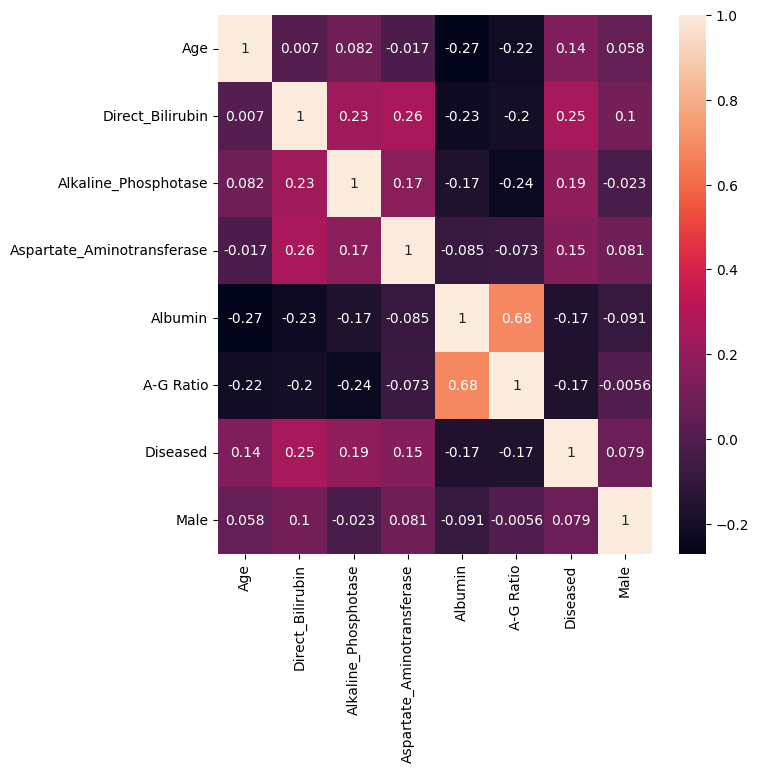

In [23]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)

In [24]:
df.corr()['Diseased'].abs().sort_values(ascending = False)

Diseased                      1.000000
Direct_Bilirubin              0.250666
Alkaline_Phosphotase          0.187560
A-G Ratio                     0.170533
Albumin                       0.166835
Aspartate_Aminotransferase    0.151101
Age                           0.138093
Male                          0.078501
Name: Diseased, dtype: float64

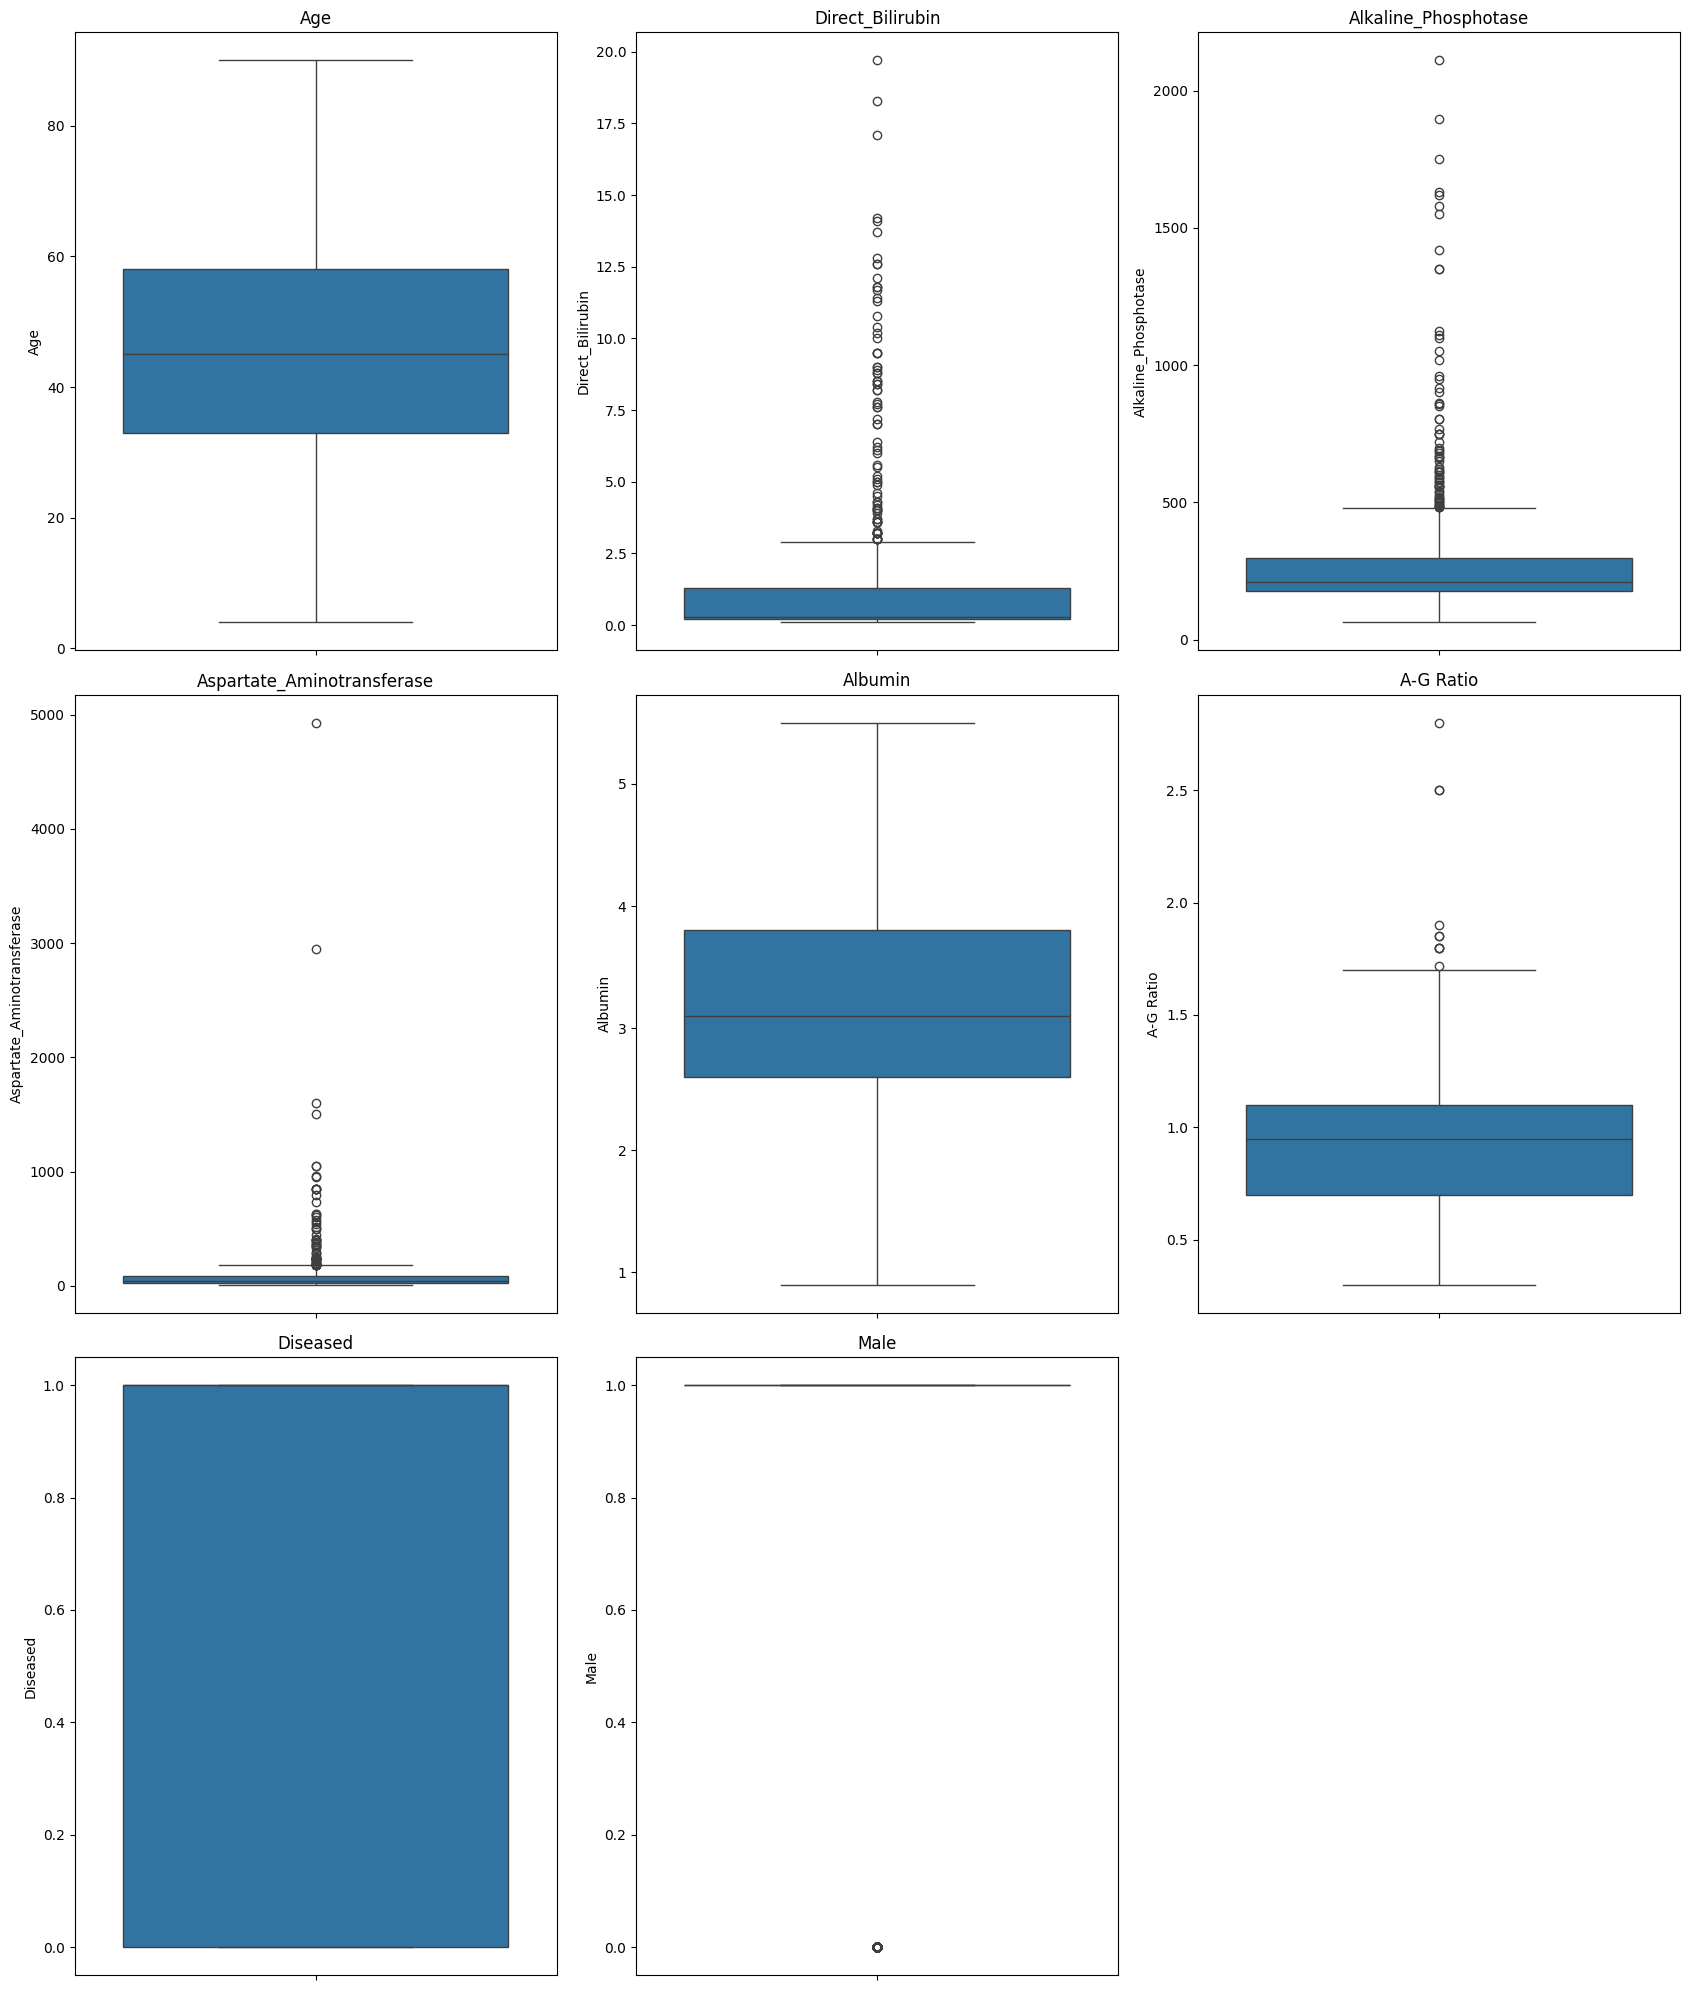

In [25]:
plt.figure(figsize=(17,20))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [26]:
x=df.drop('Diseased',axis=1)
y=df['Diseased']

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(random_state=42)

In [28]:
x_ro, y_ro = ros.fit_resample(x, y)

In [29]:
y_ro.value_counts()

Diseased
1    406
0    406
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ro,y_ro,test_size=0.2,random_state=42,stratify=y_ro)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(649, 7)
(163, 7)
(649,)
(163,)


In [32]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [33]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc =  scaler.transform(x_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
models= [('Logistic Regression', LogisticRegression()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('RandomForestClassifier',RandomForestClassifier()),
         ('AdaBoostClassifier',AdaBoostClassifier()),
         ('XGBClassifier',XGBClassifier()),
         ('KNeighborsClassifier',KNeighborsClassifier()),
         ('GaussianNB',GaussianNB())]

In [36]:
ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(x_train_sc, y_train)
    
    y_train_pred = model.predict(x_train_sc)
    y_test_pred  = model.predict(x_test_sc)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

C:\Users\Lenovo\.conda\envs\sample_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [37]:
print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

                ModelName  Train_Acc  Test_Acc
0     Logistic Regression   0.710324  0.711656
1           Decision Tree   1.000000  0.877301
2  RandomForestClassifier   1.000000  0.877301
3      AdaBoostClassifier   0.779661  0.693252
4           XGBClassifier   1.000000  0.858896
5    KNeighborsClassifier   0.798151  0.693252
6              GaussianNB   0.677966  0.717791


In [38]:
name, model = models[2]

In [39]:
import pickle
pickle.dump(model,open("model.pkl", "wb"))

In [40]:

x_train

,Age,Direct_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin,A-G Ratio,Male
569,38,0.3,216,24,4.4,1.50,True
246,42,14.2,285,130,2.1,0.60,True
341,48,0.2,150,23,3.9,1.00,False
598,35,0.2,190,35,4.7,1.80,False
129,46,2.2,310,90,2.5,0.60,False
...,...,...,...,...,...,...,...
473,42,0.2,195,15,3.0,0.80,False
480,65,0.2,265,28,1.8,0.52,True
334,38,0.2,216,105,3.5,1.00,True
223,22,0.2,300,40,3.8,0.90,True


In [41]:
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [42]:
scaler.transform([[65,0.1,187,18,3.3,0.90,0]])


C:\Users\Lenovo\.conda\envs\sample_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.29767089, -0.43299129, -0.35592055, -0.35930103,  0.11396239,
        -0.22777058, -1.71269768]])

In [43]:
x_train_sc

array([[-0.36357159, -0.34841301, -0.22196637, ...,  1.46094496,
         1.62906937,  0.58387421],
       [-0.11746159,  5.52977775,  0.0967522 , ..., -1.35547315,
        -1.15619055,  0.58387421],
       [ 0.25170341, -0.39070215, -0.5268276 , ...,  0.84868015,
         0.08170275, -1.71269768],
       ...,
       [-0.36357159, -0.39070215, -0.22196637, ...,  0.35886831,
         0.08170275,  0.58387421],
       [-1.34801157, -0.39070215,  0.16603884, ...,  0.72622719,
        -0.22777058,  0.58387421],
       [ 0.3132309 , -0.39070215, -0.48987472, ...,  0.48132127,
         0.7006494 , -1.71269768]])

In [44]:
y_train

569    0
246    1
341    1
598    0
129    1
      ..
473    1
480    0
334    1
223    0
336    0
Name: Diseased, Length: 649, dtype: int64